## Hovmoller Plots for MJO from CAM Daily Output
### - Simple time longitude plots of 2D variables

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd


import numpy as np
import os 
import glob as gb

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib import cm

import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cf

from distributed import Client
from ncar_jobqueue import NCARCluster

/glade/work/rneale/python/miniconda3/envs/neale_myenv/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [4]:
cluster = NCARCluster()
cluster.scale(10)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/rneale/Cheyenne/proxy/8787/status,
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/rneale/Cheyenne/proxy/8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.0.3:38407,Workers: 0
Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/rneale/Cheyenne/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [6]:
run_name = 'f.e22.FHIST.f09_f09.cesm2_2.mcont_mjo_ocn.001'
dir_in = '/glade/scratch/rneale/archive/'
files_in = dir_in+run_name+'/atm/hist/*h1*.nc'
files_list = sorted(gb.glob(files_in))



In [7]:
da_run = xr.open_mfdataset(files_list, decode_cf=True, decode_times = True, parallel=True) 

In [8]:
da_run['PRECT']

<xarray.DataArray 'PRECT' (time: 7666, lat: 192, lon: 288)>
dask.array<concatenate, shape=(7666, 192, 288), dtype=float32, chunksize=(30, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1979-01-01 00:00:00 ... 2000-01-01 00:00:00
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean

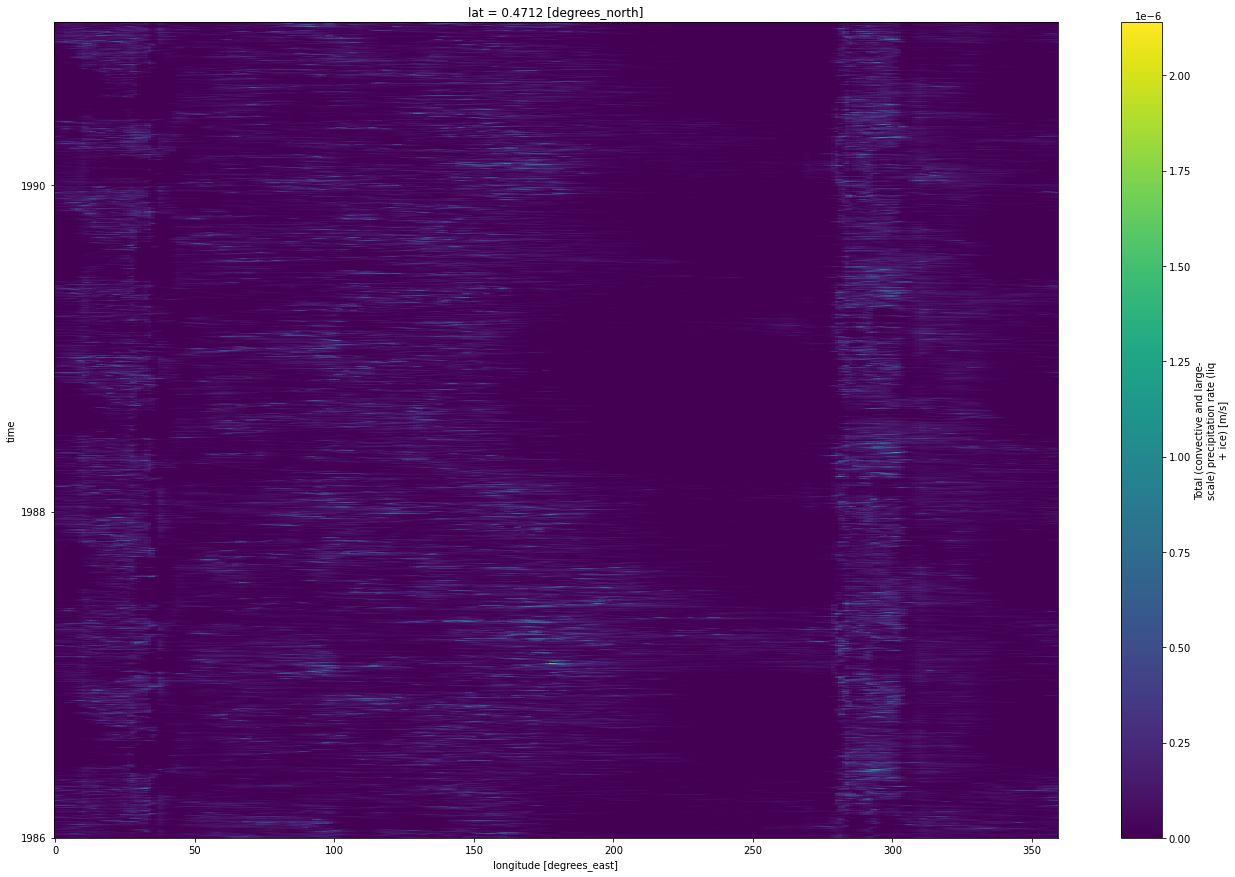

In [10]:
da_run['PRECT'].isel(lat=96).sel(time=slice("1986-01-01","1990-12-31")).plot(size=15)